# Natural Language Processing (NLP) 

## Udemy Course - Learning for Data Analysis Visualization
## Learning TFIDF

In [84]:
# Download the Natural Language Took Kit corpus of stop words.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/boukhris-
[nltk_data]     escandon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Download the data from the UC Irvine ML Repo
# https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip --output data/smsspamcollection.zip
#!unzip data/smsspamcollection.zip

In [3]:
# Read in the downloaded sms message data
messages = [line.rstrip() for line in open('data/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
for num, message in enumerate(messages[:10]):
    print(num, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [6]:
# Unsupervised Learning Model
# Training text, documents, images > Feature Vectors > Machine Learning Algo > Predictive Model > Likelihood or Cluster ID

In [7]:
messages = pd.read_csv('data/SMSSpamCollection', sep='\t', names=['labels', 'message'])

In [8]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.groupby(by='labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

## Feature Engineering

In [13]:
# Create a new column with the length of the message
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


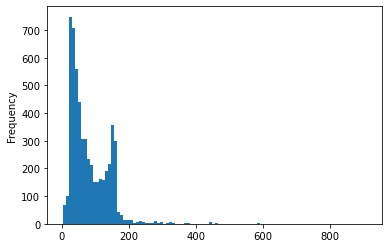

In [22]:
# View a histogram of the length of the messages
messages['length'].plot(bins=100, kind='hist');

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [25]:
# View the longest message
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

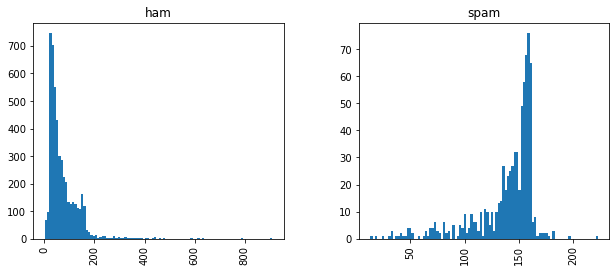

In [28]:
# Look at the histograms for the two labels
messages.hist(column='length', by='labels', bins=100, figsize=(10,4));

## Turn Raw messages and turn them into Vectors

In [30]:
mess = 'Sample message! Notice: it has puncutation'

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
# Remove punctuation
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)

In [35]:
nopunc

'Sample message Notice it has puncutation'

In [37]:
# Remove stop words
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'puncutation']

In [39]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['Sample', 'message', 'Notice', 'puncutation']

In [41]:
# Now create a function that cleans that data given the test one down above

def text_process(mess):
    """
    Takes in a string of text, then performs:
    1. Removes all the punctuation
    2. Removes all the english stopwords
    3. Returns a list of cleaned text
    """
    # 1. 
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters back to for the string
    nopunc = ''.join(nopunc)
    
    # 2. & 3.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [42]:
text_process('I am Sam')

['Sam']

In [43]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
# Tokenize the messages
# This one is not done in-place, just an example
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [46]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [47]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x7fd9482e3a60>)

In [48]:
message4 = messages['message'][3]

In [49]:
print(message4)

U dun say so early hor... U c already then say...


In [50]:
bow4 = bow_transformer.transform([message4])

In [51]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [53]:
print(bow_transformer.get_feature_names()[4068])

U


/Users/boukhris-escandon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
messages_bow = bow_transformer.transform(messages['message'])

In [58]:
print(messages_bow.shape)
print(messages_bow.nnz) # number of non-zero occurences

(5572, 11425)
50548


In [59]:
# Term Frequency - how frequently the term occurs in a document. TF(t) = (number of times a term t appears in a document) / (Total number of terms in the document)
# Inverse Document Frequency - measures how important a term is. IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [61]:
# TF-IDF Transformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [63]:
tfidf4 = tfidf_transformer.transform(bow4)

In [65]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [68]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [69]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [70]:
messages_tfidf.shape

(5572, 11425)

## Spam vs Ham Classifier
Naive Bayes Classifier

In [73]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [75]:
print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Expected: ', messages['labels'][3])

Predicted:  ham
Expected:  ham


In [76]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [80]:
# Results without splitting out a test set of data. Tested on all the training
print(classification_report(messages['labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [83]:
# Now do the train test split
msg_train, msg_tst, label_train, label_test = train_test_split(messages['message'], messages['labels'], test_size=0.2)

In [87]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer = text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])

In [89]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd9482e3a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [91]:
predictions = pipeline.predict(msg_tst)

In [93]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1021
        spam       0.73      1.00      0.84        94

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115

